### DBSCAN 적용하기 – 붓꽃 데이터 셋

In [7]:
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**eps 0.6 min_samples=8 로 DBSCAN 군집화 적용**

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


In [9]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

**PCA 2개 컴포넌트로 기존 feature들을 차원 축소 후 시각화**

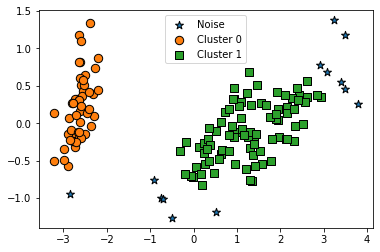

In [15]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_componets=2로 피처 데이터 세트 변환
pca = PCA(n_components=2, random_state=0)
pca_transformed = pca.fit_transform(iris.data)
# visualize_cluster_2d( ) 함수는 ftr1, ftr2 컬럼을 좌표에 표현하므로 PCA 변환값을 해당 컬럼으로 생성
irisDF['ftr1'] = pca_transformed[:,0]
irisDF['ftr2'] = pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

**eps의 크기를 증가 한 후 노이즈 확인**  
(노이즈 감소)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


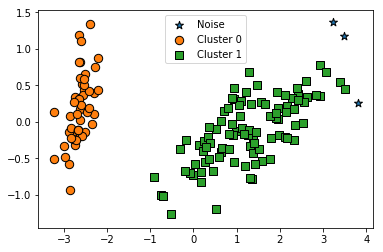

In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)


**min_samples의 크기를 증가 후 노이즈 확인**  
(노이즈 증가)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


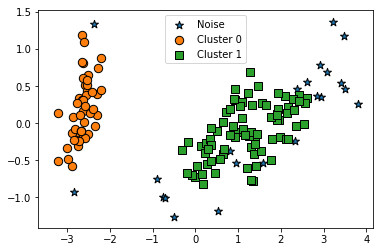

In [10]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

### DBSCAN 적용하기 – make_circles() 데이터 세트

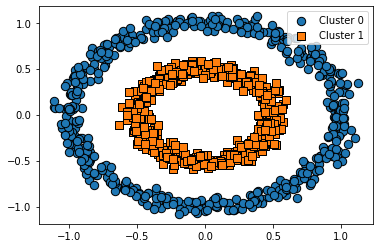

In [23]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.5)
#(make_circles()에 shift+tap 눌러보면 설명 하단에 'X : array of shape [n_samples, 2]' 설명이 있음.)
#(그래서 아래 코드에서 피처 2개 생성한 것/ 'factor'는 두 원 사이의 간격조정(0~1))
#(y : array of shape [n_samples] The integer labels (0 or 1) for class membership of each sample.)
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)


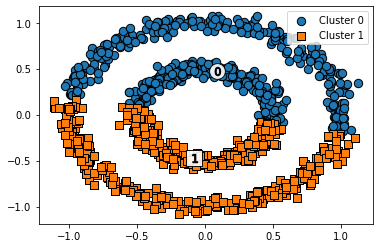

In [27]:
# KMeans로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, max_iter=1000, random_state=0)
kmeans_labels = kmeans.fit_predict(X)
clusterDF['kmeans_cluster'] = kmeans_labels

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_cluster', iscenter=True)


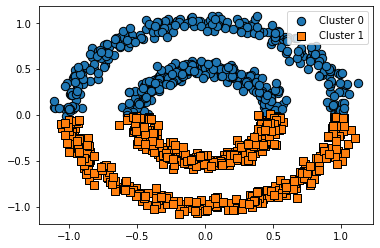

In [30]:
# GMM으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_label = gmm.fit(X).predict(X)
clusterDF['gmm_cluster'] = gmm_label

visualize_cluster_plot(gmm, clusterDF, 'gmm_cluster', iscenter=False)


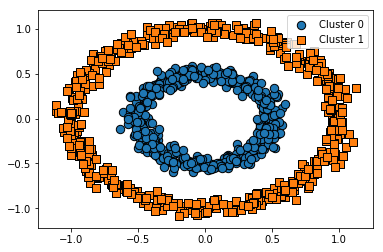

In [14]:
# DBSCAN으로 make_circles( ) 데이터 셋을 클러스터링 수행. 
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X)
clusterDF['dbscan_cluster'] = dbscan_labels

visualize_cluster_plot(dbscan, clusterDF, 'dbscan_cluster', iscenter=False)


**-질문답변정리)**  
-질문) 혹시 입실론(eps)을 하이퍼 파라미터라고 생각하고 이를 최적으로 튜닝하는 방법은 없을까요?  
-답변)  
epsilon과 min points을 튜닝하는게 만만치는 않습니다. 먼저 GridSearch와 같이 값을 변화 시키면서 최적값을 찾는 방법이 있습니다. 하지만 이걸 여쭤보신건 아닌것 같습니다.  
epsilon 튜닝은 보통 K Distance plot(KNN Distance plot)을 이용해서 감을 잡는 방법이 있습니다( 이 방법이 정확한지는 논란이 있습니다만)  
1. K Nearest Neighbor를 각 point별로 수행하여 각 point별로 K개 내에 있는 가장 가까운 거리를 계산합니다. 이때 거리는 0~1 사이 값으로 정규화 합니다. 
2. 개별 point별로 계산된 k distance값을 기반으로 다시 이들 개별 point들을 k distance값별로 오름차순 정렬을 합니다. 즉 가장 작은 k distance값을 가진 point를 첫번째 위치로 놓고,  순차적으로 큰 k distance값을 가진 point들을 두번째, 세번째 위치로 놓습니다.
예를 들어 첫번째 포인트가 0.05, 두번째 포인트가 0.01, 세번째 포인트가 0.07 이라면 이들의 순서를 이동해서 첫번째 위치에 두번째 포인트를, 두번째 위치에 첫번째 포인트, 세번째 위치에 세번째 포인트를 놓는 형식으로 정렬시킵니다.  
3. 그런 다음 이렇게 정렬된 point 집합들을 plot을 scatter plot형식으로 x축을 개별 데이터 포인트의 인덱스(그러니까 첫번째, 두번째, 세번째.), 그리고 y축을 K distance로 표시해서 그리면 자연스럽게 왼쪽으로 오른쪽으로 가면서 우상향 하는 그래프가 만들어집니다. 이때 k distance가 급격히 커지는, 즉 너무 포인트간의 거리가 커지는 영역(즉 포인트들이 몰려있지 않는 영역) 이전 까지가 주로 포인트들이 몰려 있는 것입니다. 그러니가 k plot으로 그렸을 때 갑자기 우상향 그래프가 위로 올라가지 전까지의 지점까지를 골라서 epsilon으로 선택합니다. 
이게 설명으로만 하기에 이해가 부족하실 수 있어서, 아래 링크도 참조하시면 좋을 것 같습니다.  
https://medium.com/@mohantysandip/a-step-by-step-approach-to-solve-dbscan-algorithms-by-tuning-its-hyper-parameters-93e693a91289 